<a href="https://colab.research.google.com/github/Prath4AI/Global-Space-Missions-Analysis-1957-202/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

In [ ]:
%pip install iso3166

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [ ]:
df1 = df_data.drop(df_data.columns[[0,1]], axis=1)

In [ ]:
df1.Price = df1.Price.str.replace(",","", regex=False)

In [ ]:
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

In [ ]:
df1.Price = df1.Price.fillna(0)

In [ ]:
df1.Date = df1.Date.str.replace(r"\s\d{2}:\d{2}\sUTC", "", regex=True)

In [ ]:
df1.Date = pd.to_datetime(df1.Date, format= "%a %b %d, %Y")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   datetime64[ns]
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Price           4324 non-null   float64       
 6   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [ ]:
df1.describe()

,Date,Price
count,4324,"4,324.00"
mean,1987-11-28 05:24:01.998149824,34.29
min,1957-10-04 00:00:00,0.00
25%,1972-04-19 18:00:00,0.00
50%,1984-12-16 12:00:00,0.00
75%,2002-09-10 12:00:00,0.00
max,2020-08-07 00:00:00,"5,000.00"
std,NaN,150.44


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

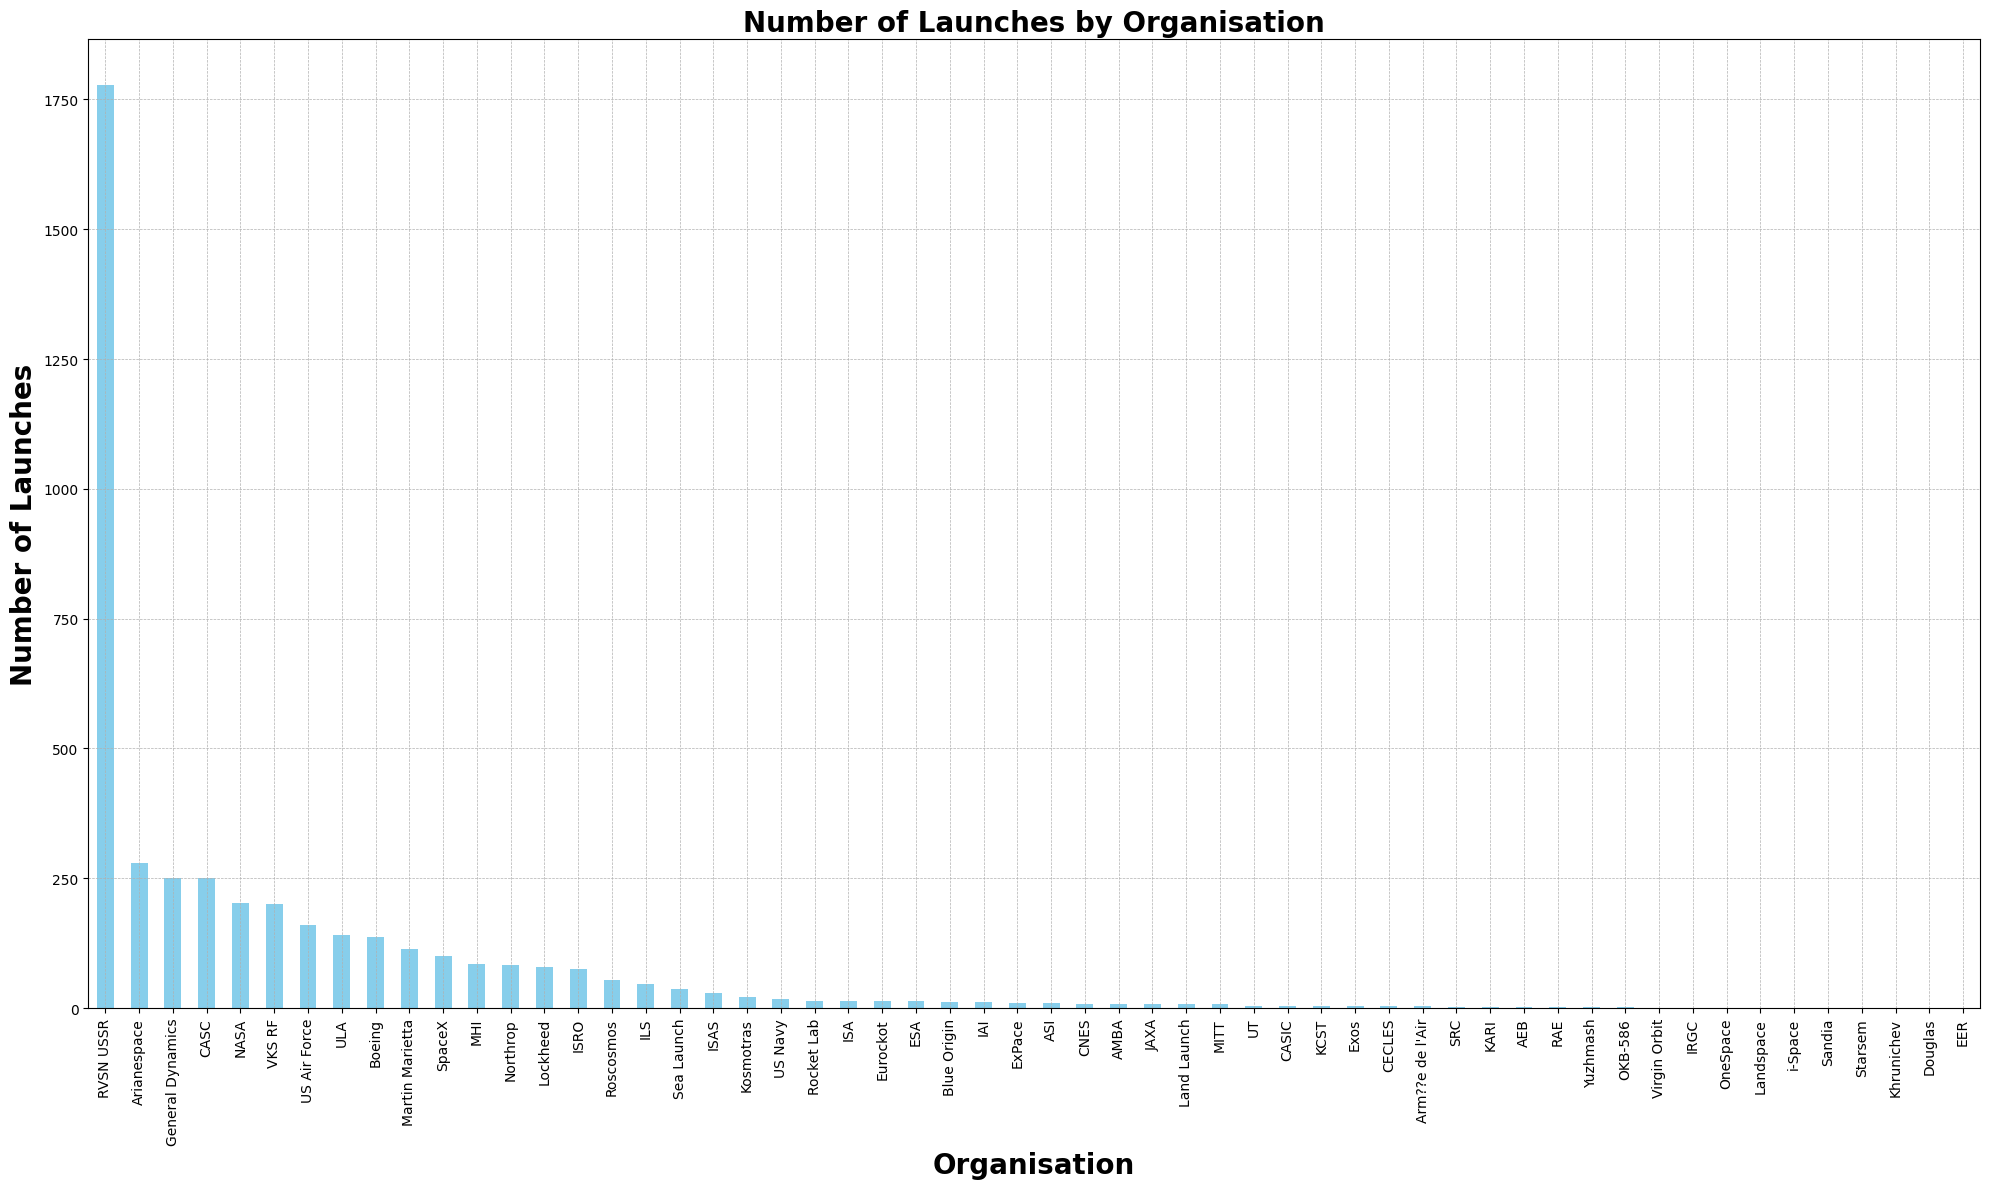

In [ ]:
Org_qua = df1.Organisation.value_counts()

plt.figure(figsize=(20,12))
Org_qua.plot(kind='bar', color='skyblue')
plt.title('Number of Launches by Organisation', fontweight='bold', fontsize=20)
plt.xlabel('Organisation', fontweight='bold', fontsize=20)
plt.ylabel('Number of Launches', fontweight='bold', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

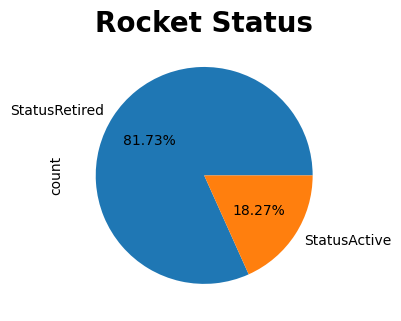

In [ ]:
statues = df1.Rocket_Status.value_counts()
plt.figure(figsize=(4,4))
statues.plot(kind='pie', autopct='%1.2f%%')
plt.title('Rocket Status', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

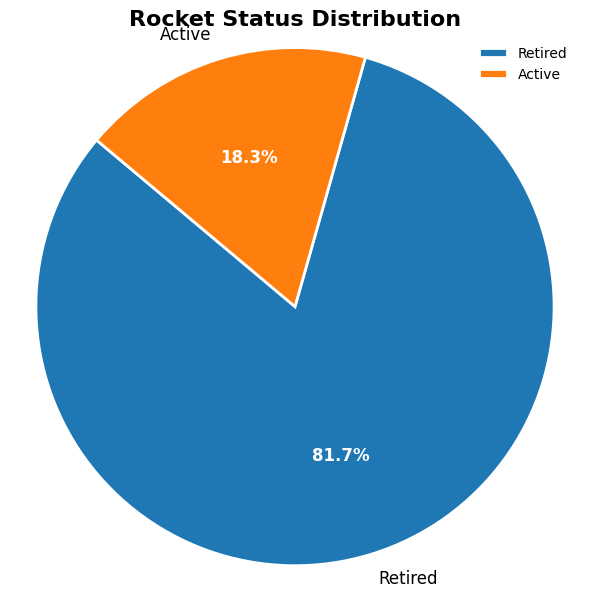

In [ ]:
# Example data
labels = ['Retired', 'Active']
sizes = [81.73, 18.27]
colors = ['#1f77b4', '#ff7f0e']  # professional palette (blue & orange)

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Title styling
ax.set_title('Rocket Status Distribution', fontsize=16, fontweight='bold')

# Better label positioning
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('medium')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Equal aspect ratio ensures pie is a circle
ax.axis('equal')

# Add a subtle border around slices
for w in wedges:
    w.set_edgecolor('white')
    w.set_linewidth(2)

# Optional: Add legend
ax.legend(labels, loc='upper right', frameon=False)

plt.tight_layout()
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

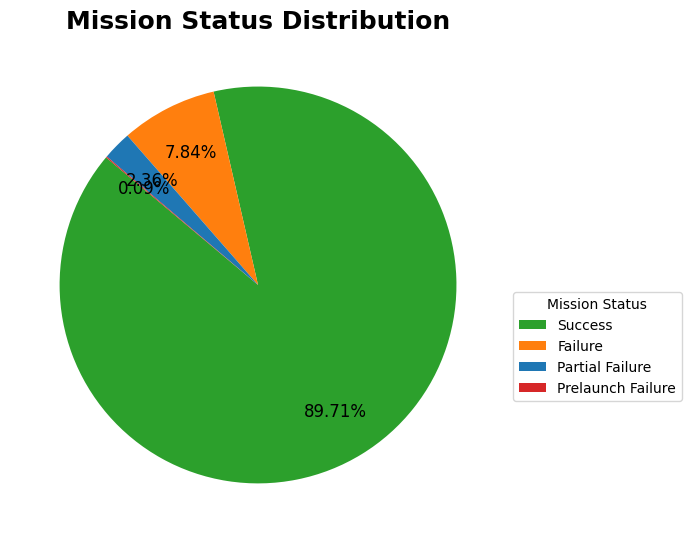

In [ ]:
import matplotlib.pyplot as plt

# Value counts
success = df1['Mission_Status'].value_counts()

# Define custom colors for clarity
colors = ['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728']

# Create figure
plt.figure(figsize=(7, 7))

# Pie chart
patches, texts, autotexts = plt.pie(
    success,
    labels=None,  # Hide labels from the chart
    autopct='%1.2f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12},
    pctdistance=0.75
)

# Title
plt.title('Mission Status Distribution', fontweight='bold', fontsize=18)

# Add legend
plt.legend(patches, success.index, title='Mission Status', loc='best', bbox_to_anchor=(1, 0.5))

# Remove axis label
plt.ylabel('')

# Neat layout
plt.tight_layout()

# Show plot
plt.show()


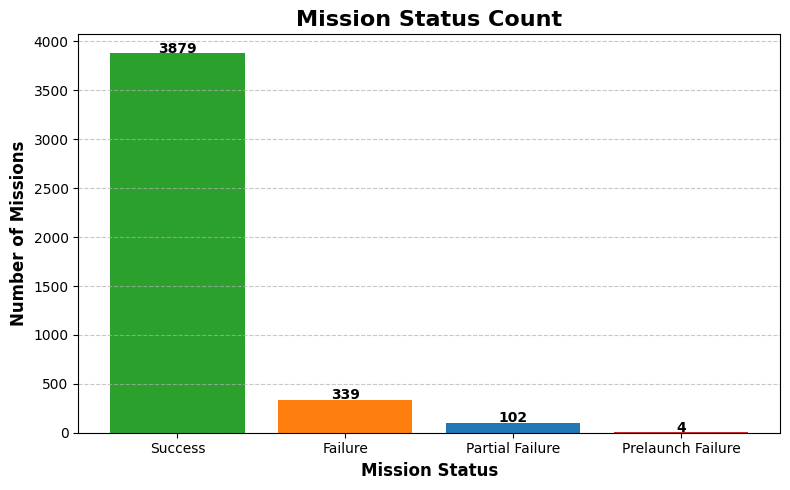

In [ ]:
import matplotlib.pyplot as plt

# Get counts
status_counts = df1['Mission_Status'].value_counts()

# Plot
plt.figure(figsize=(8,5))
plt.bar(status_counts.index, status_counts.values, color=['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728'])  # Custom colors

# Titles and labels
plt.title('Mission Status Count', fontsize=16, fontweight='bold')
plt.xlabel('Mission Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Missions', fontsize=12, fontweight='bold')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on top of bars
for i, val in enumerate(status_counts.values):
    plt.text(i, val + 5, str(val), ha='center', fontweight='bold')

# Layout
plt.tight_layout()
plt.show()



# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

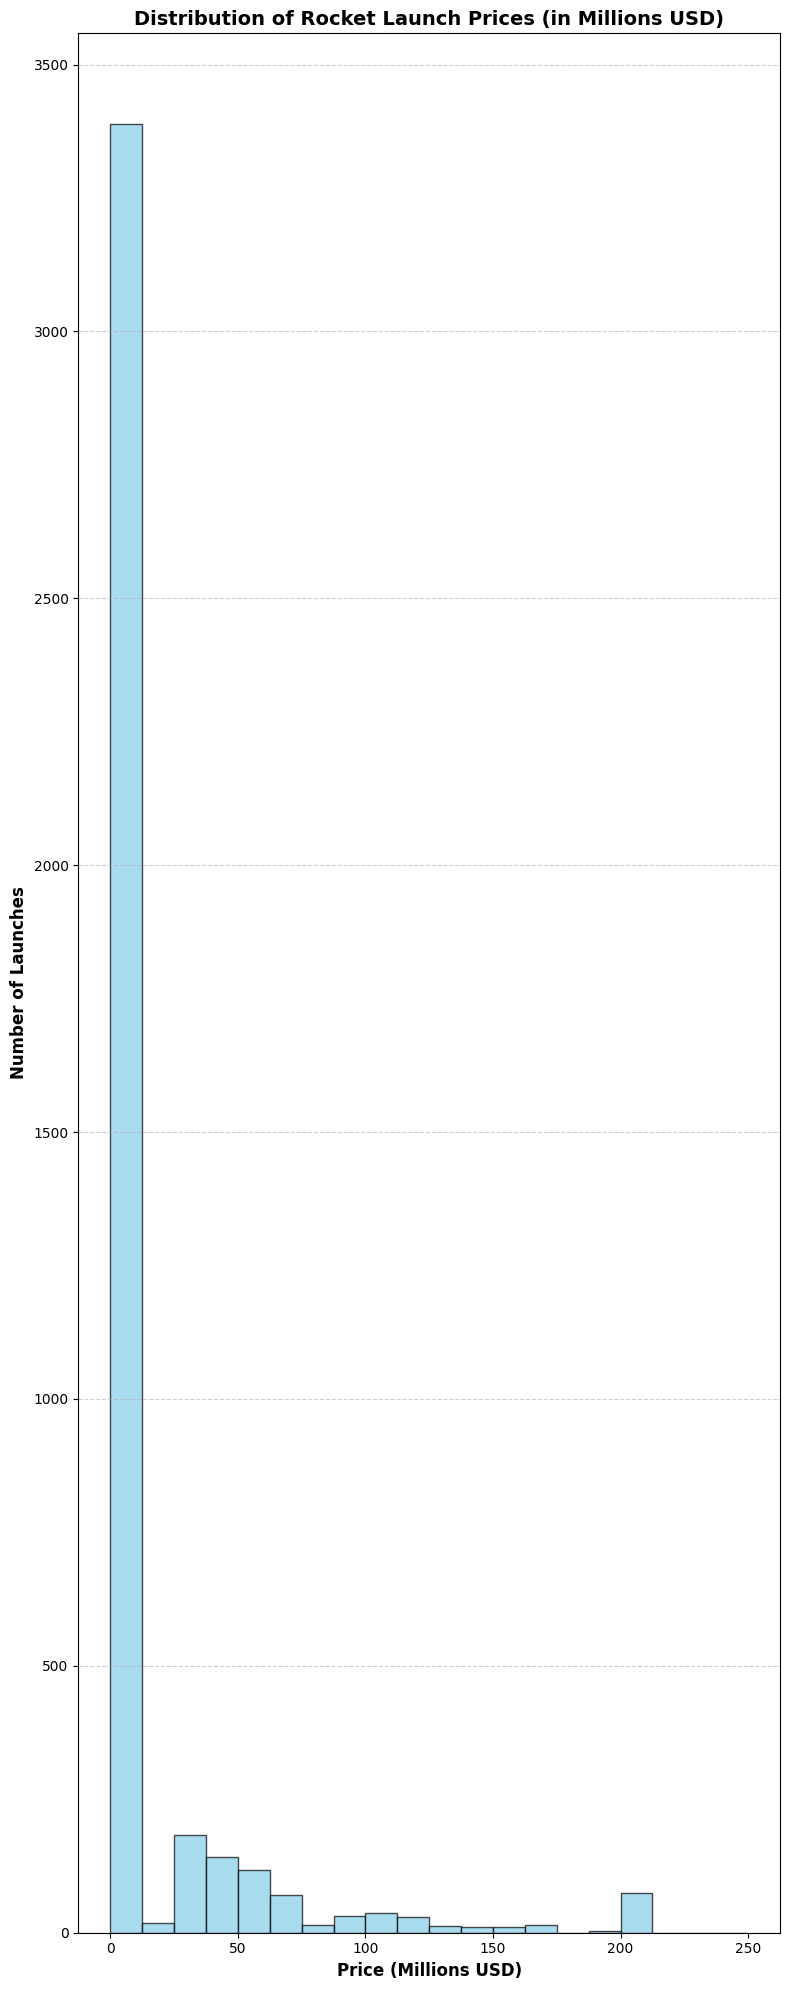

In [ ]:
plt.figure(figsize=(8,20))

plt.hist(df1['Price'], bins=20, range=(0, 250), color='skyblue', edgecolor='black', alpha=0.7)

# Titles and labels
plt.title('Distribution of Rocket Launch Prices (in Millions USD)', fontsize=14, fontweight='bold')
plt.xlabel('Price (Millions USD)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Launches', fontsize=12, fontweight='bold')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df1.Location = df1.Location.apply(lambda x: x.split(",")[-1].strip()) #split location to individual str to get country name

In [ ]:
df1.Location.value_counts()

,count
Location,
Russia,1395
USA,1344
Kazakhstan,701
France,303
China,268
Japan,126
India,76
Pacific Ocean,36
Iran,13


In [ ]:
country_replacements = {'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA','Pacific Ocean':"Kiribati", 'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Republic of',
    'North Korea': "Korea, Democratic People's Republic of",
    'South Korea': 'Korea, Republic of'
}
df1.Location = df1.Location.replace(country_replacements) #replace some of the countries accorrding to iso3166

In [ ]:
df1.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,USA,2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,Kazakhstan,2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
def to_alpha3(Location):
    try:
        return countries[Location.upper()].alpha3
    except KeyError:
        return None

df1['Country_Code'] = df1['Location'].apply(to_alpha3) #created function to convert names to short codes

In [ ]:
df1[['Country_Code', 'Location']].head(2)

,Country_Code,Location
0,USA,USA
1,CHN,China


In [ ]:
country_counts = df1['Country_Code'].value_counts().reset_index()
country_counts.columns = ['Country_Code', 'Launches']
country_counts.head()

,Country_Code,Launches
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269


In [ ]:
fig = px.choropleth(
    country_counts,
    locations='Country_Code',
    color='Launches',
    color_continuous_scale='matter',  # Color theme
    title='Number of Rocket Launches by Country',
    projection='natural earth'  # World map style
)
fig.update_layout(
    title_font_size=20,
    geo=dict(showframe=False, showcoastlines=True)
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country

In [ ]:
failed_launches = df1[df1['Mission_Status'] == 'Failure']
failed_counts = failed_launches['Country_Code'].value_counts().reset_index()
failed_counts.columns = ['Country_Code', 'Failures']
failed_launches.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Code
11,ExPace,China,2020-07-10,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN
15,Rocket Lab,New Zealand,2020-07-04,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL
27,Virgin Orbit,USA,2020-05-25,LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA
36,CASC,China,2020-04-09,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN
43,CASC,China,2020-03-16,Long March 7A | XJY-6,StatusActive,0.00,Failure,CHN


In [ ]:
fig = px.choropleth(
    failed_counts,
    locations='Country_Code',
    color='Failures',
    color_continuous_scale='matter',  # Color theme
    title='Number of Rocket Launches by Country',
    projection='natural earth'  # World map style
)
fig.update_layout(
    title_font_size=20,
    geo=dict(showframe=False, showcoastlines=True)
)
fig.show()

\# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
fig = px.sunburst(
    df1,
    path=['Location', 'Organisation', 'Mission_Status'],
    values='Price',
    color='Mission_Status',
    color_discrete_sequence=px.colors.qualitative.Prism  # <-- valid qualitative color scale
)

fig.update_layout(
    title='Sunburst Chart: Location > Organisation > Mission Status',
    title_x=0.5,
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()



# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_spent = df1.groupby('Organisation')['Price'].sum().reset_index()
total_spent.columns = ['Organisation', 'Total_Spent']
total_spent = total_spent.sort_values(by='Total_Spent', ascending=False)
total_spent.head()

,Organisation,Total_Spent
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"


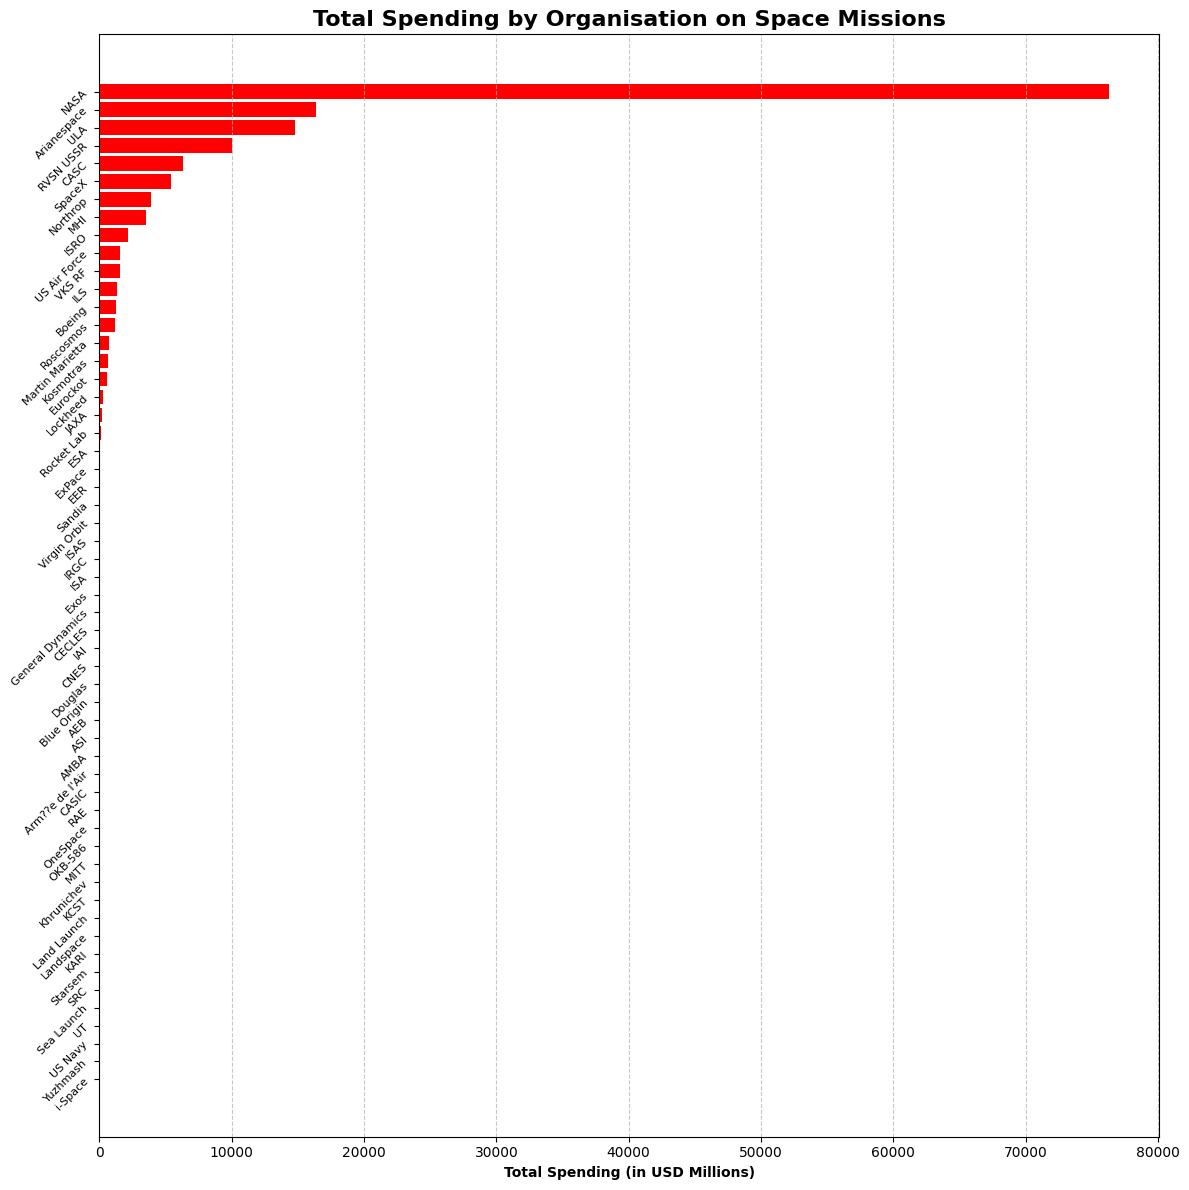

In [ ]:
plt.figure(figsize=(12, 12))
plt.barh(total_spent['Organisation'], total_spent['Total_Spent'], color='Red')
plt.xlabel('Total Spending (in USD Millions)', fontweight='bold')
plt.title('Total Spending by Organisation on Space Missions', fontweight='bold', fontsize=16)
plt.gca().invert_yaxis()  # Highest spender on top
plt.yticks(fontsize=8, rotation = 45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_moeny = df1.groupby('Organisation')['Price'].mean().reset_index()
df_moeny.columns = ['Organisation','Price']
df_moeny = df_moeny.sort_values(by='Price', ascending=False)

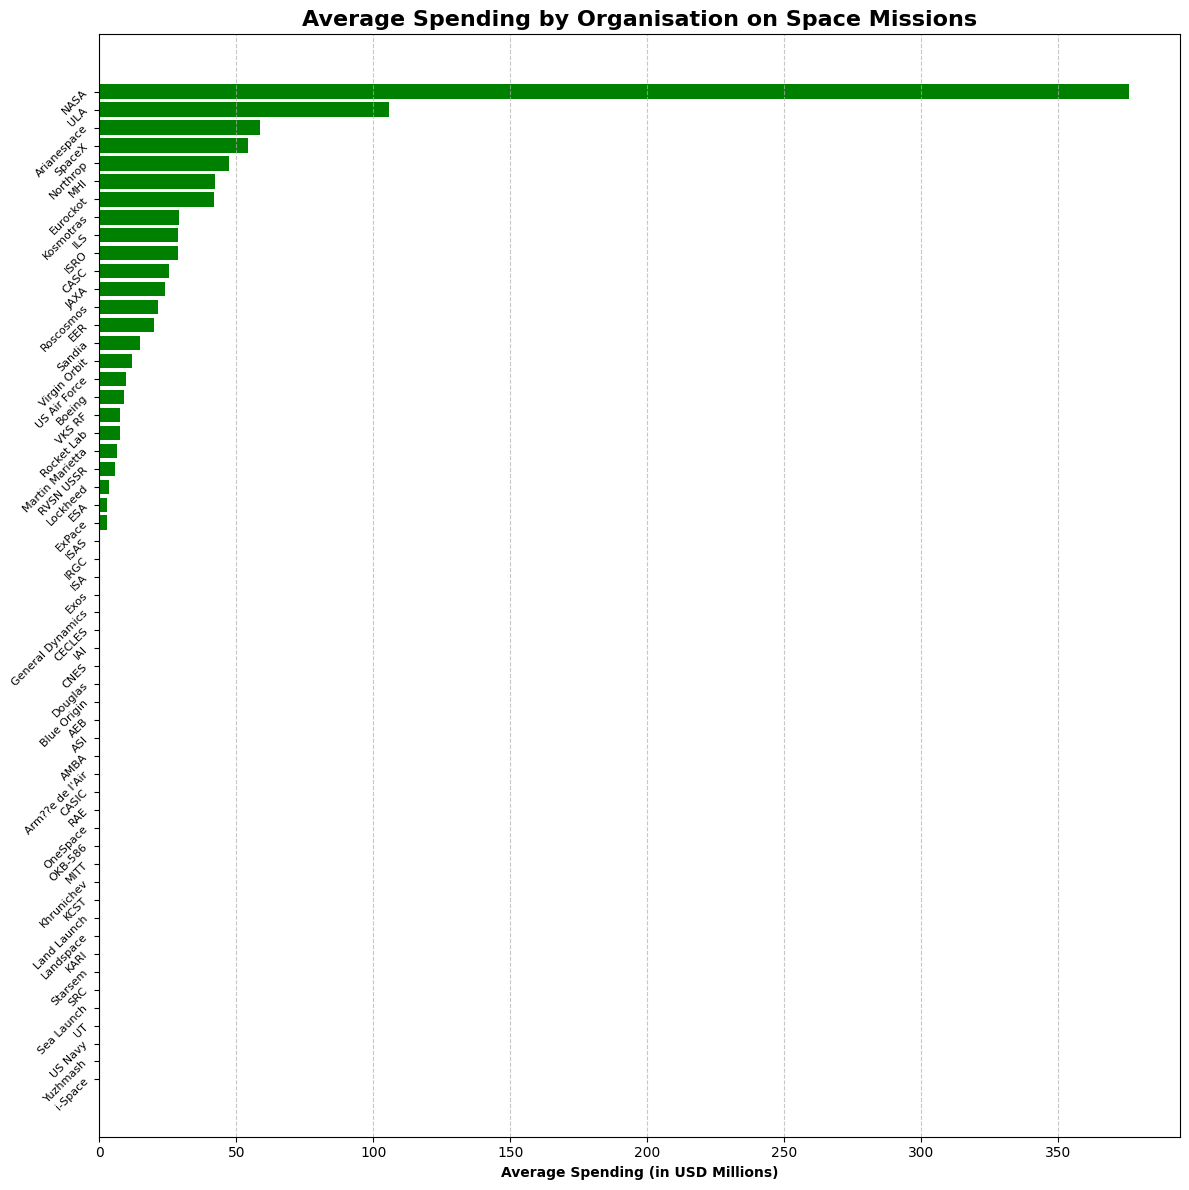

In [ ]:
plt.figure(figsize=(12,12))
plt.barh(df_moeny.Organisation, df_moeny.Price, color='Green')
plt.xlabel('Average Spending (in USD Millions)', fontweight='bold')
plt.title('Average Spending by Organisation on Space Missions', fontweight='bold', fontsize=16)
plt.gca().invert_yaxis()  # Highest spender on top
plt.yticks(fontsize=8, rotation = 45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [ ]:
launches = df1.groupby(df1['Date'].dt.year)['Organisation'].count().reset_index()
launches.columns = ['Year', 'Launches']
launches.head()

,Year,Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


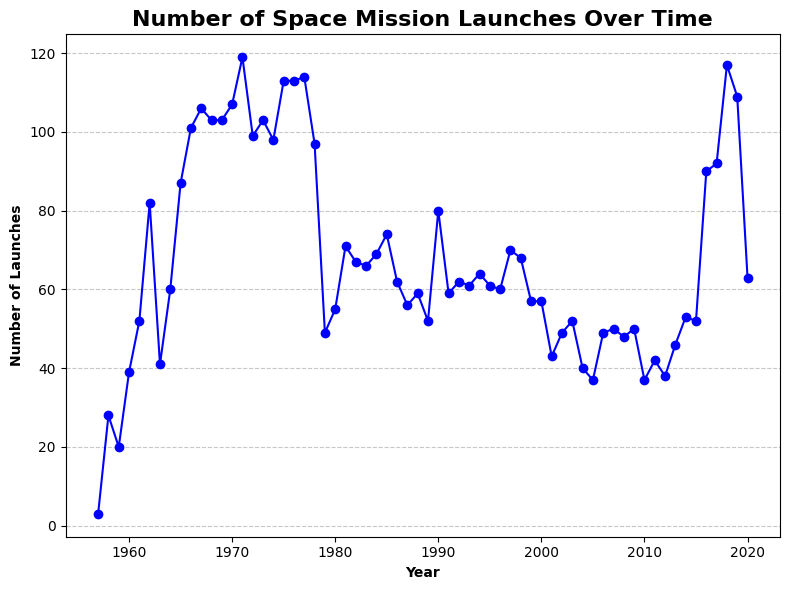

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(launches['Year'], launches['Launches'], marker='o', linestyle='-', color='Blue')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Launches', fontweight='bold')
plt.title('Number of Space Mission Launches Over Time', fontweight='bold', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

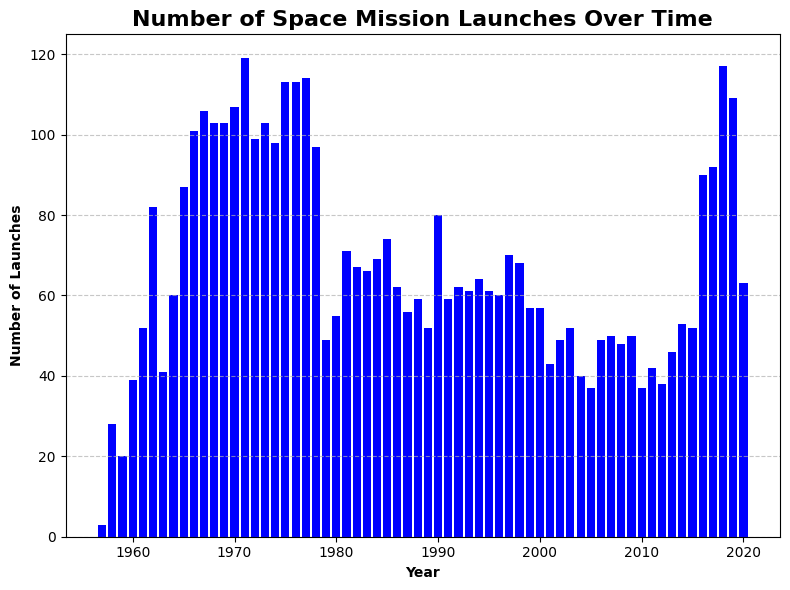

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(launches['Year'], launches['Launches'], color='Blue')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Launches', fontweight='bold')
plt.title('Number of Space Mission Launches Over Time', fontweight='bold', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df1['Decade'] = (df1['Date'].dt.year // 10) * 10
launches_per_decade = df1.groupby('Decade')['Organisation'].count().reset_index()
launches_per_decade = launches_per_decade.sort_values(by='Organisation', ascending=False)
launches_per_decade.head()

,Decade,Organisation
2,1970,1012
1,1960,774
6,2010,676
4,1990,642
3,1980,631


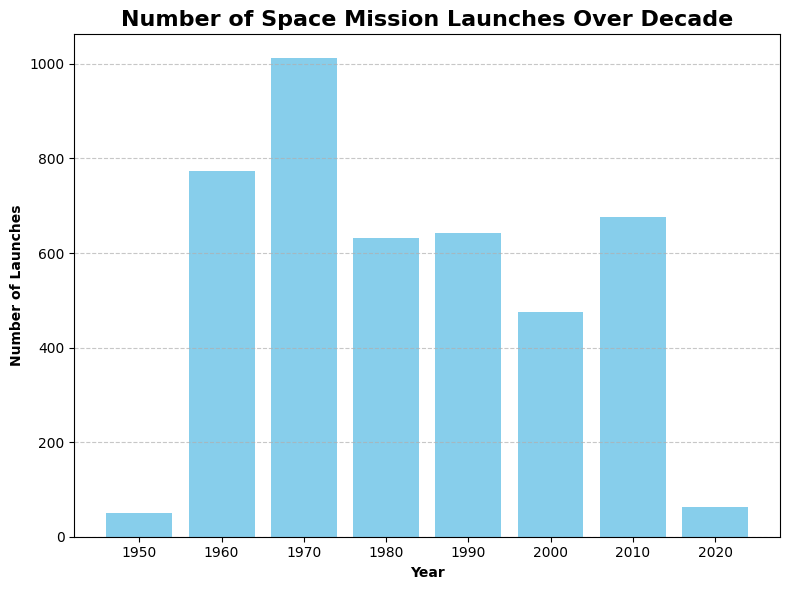

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(launches_per_decade.Decade, launches_per_decade.Organisation, width=8, color='Skyblue')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Launches', fontweight='bold')
plt.title('Number of Space Mission Launches Over Decade', fontweight='bold', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df1['YearMonth'] = df1.Date.dt.to_period('M').astype(str)
monthly_launches = df1.groupby('YearMonth').size().reset_index(name='Launches')
monthly_launches['Rolling_Avg'] = monthly_launches['Launches'].rolling(window=3).mean()
df1.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Code,Decade,YearMonth
0,SpaceX,USA,2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08
1,CASC,China,2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,2020-08
2,SpaceX,USA,2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020,2020-08
3,Roscosmos,Kazakhstan,2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,2020-07
4,ULA,USA,2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07


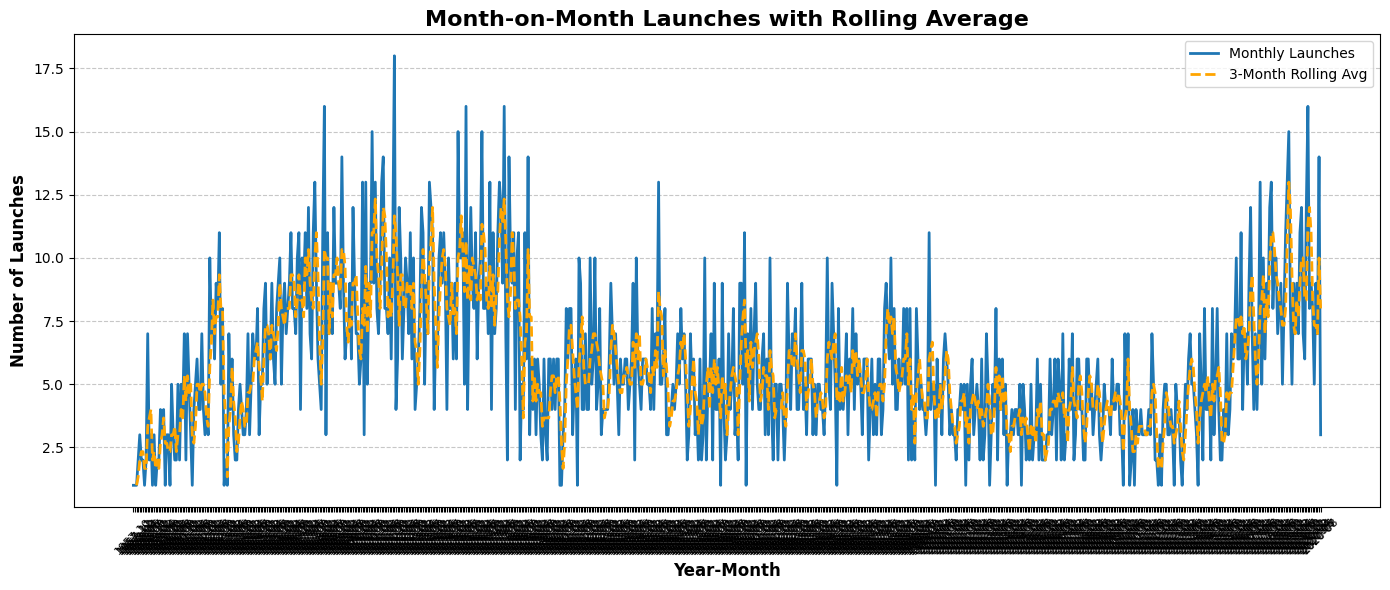

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_launches['YearMonth'], monthly_launches['Launches'], label='Monthly Launches', linewidth=2)
plt.plot(monthly_launches['YearMonth'], monthly_launches['Rolling_Avg'], label='3-Month Rolling Avg', linewidth=2, linestyle='--', color='orange')

plt.title('Month-on-Month Launches with Rolling Average', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Launches', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Code,Decade,YearMonth
0,SpaceX,USA,2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08
1,CASC,China,2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,2020-08
2,SpaceX,USA,2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,2020,2020-08
3,Roscosmos,Kazakhstan,2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,2020-07
4,ULA,USA,2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df1['Month'] = df1['Date'].dt.month_name()
monthly_counts = df1['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])



In [ ]:
# Convert Series to DataFrame with index and values
monthly_counts_df = monthly_counts.reset_index()

# Rename columns: one from index, one from values
monthly_counts_df.columns = ['Month', 'Launches']

# Sort by number of launches
monthly_counts_df = monthly_counts_df.sort_values('Launches', ascending=False)

monthly_counts_df.head()


,Month,Launches
11,December,450
5,June,402
3,April,383
9,October,381
7,August,373


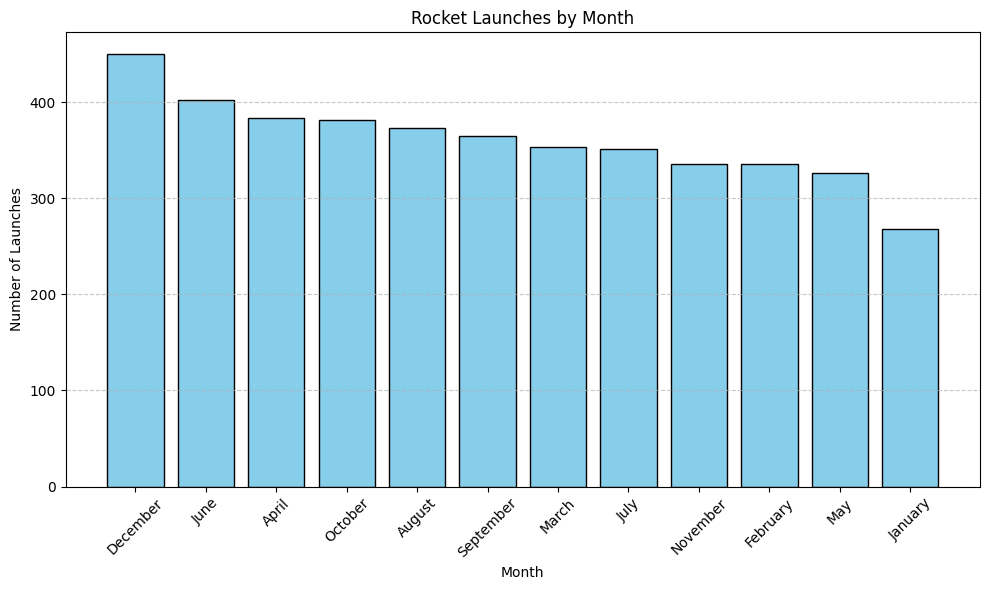

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(monthly_counts_df['Month'], monthly_counts_df['Launches'], color='skyblue', edgecolor='black')

plt.title('Rocket Launches by Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

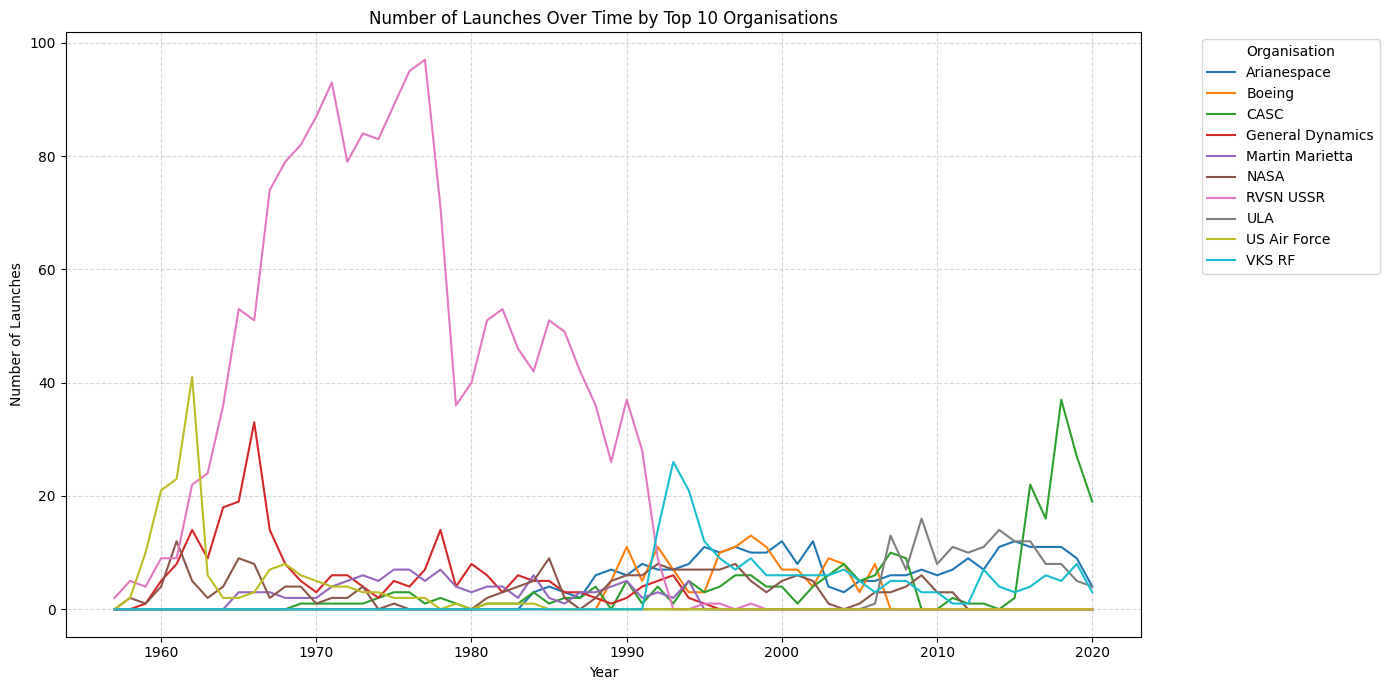

In [ ]:
# Step 1: Find top 10 organisations by total number of launches and convert it into list
top_10_orgs = df1['Organisation'].value_counts().head(10).index.tolist()

# Step 2: Filter dataset for top 10 organisations and check if itsin the list.
filtered_df = df1[df1['Organisation'].isin(top_10_orgs)].copy()

# Step 3: Extract Year from the Date
filtered_df['Year'] = filtered_df['Date'].dt.year

# Step 4: Group by Year and Organisation
launches_by_year = filtered_df.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

# Step 5: Pivot the data to wide format for plotting
launches_pivot = launches_by_year.pivot(index='Year', columns='Organisation', values='Launches').fillna(0)

# Step 6: Plot the data
plt.figure(figsize=(14, 7))

for org in launches_pivot.columns:
    plt.plot(launches_pivot.index, launches_pivot[org], label=org)

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

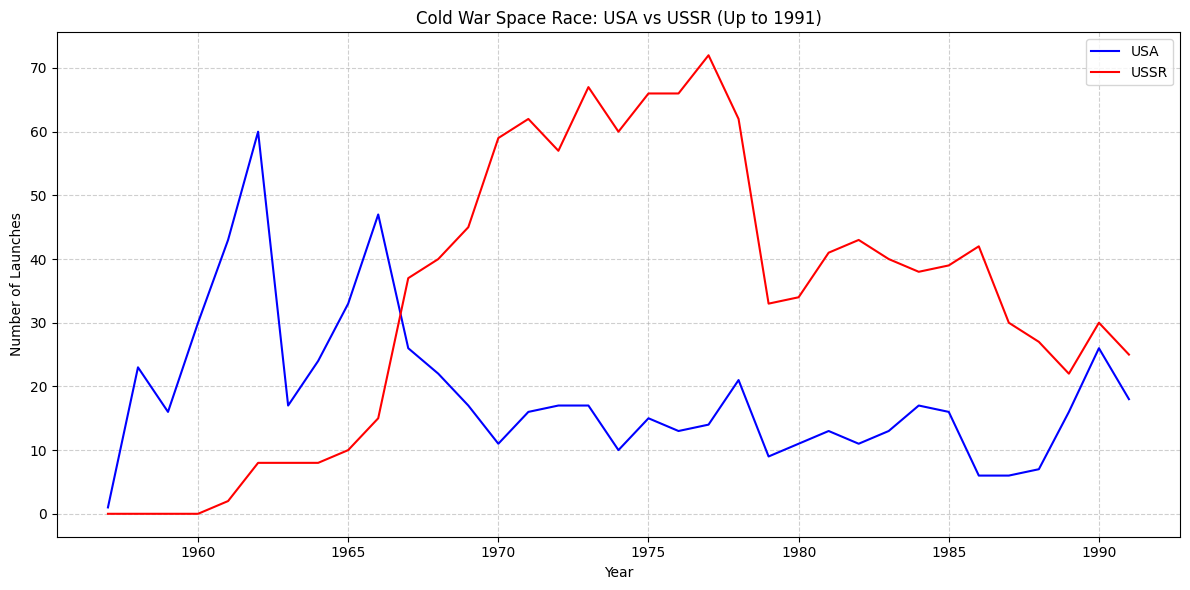

In [ ]:
# Step 1: Create a copy and extract Year
cold_war_df = df1.copy()
cold_war_df['Year'] = cold_war_df['Date'].dt.year

# Step 2: Filter records up to 1991 (Cold War period)
cold_war_df = cold_war_df[cold_war_df['Year'] <= 1991]

# Step 3: Normalize country names for Cold War analysis
def normalize_country(row):
    if 'Russia' in row or 'USSR' in row:
        return 'USSR'
    elif 'USA' in row:
        return 'USA'
    else:
        return None

cold_war_df['Superpower'] = cold_war_df['Location'].apply(normalize_country)
cold_war_df = cold_war_df[cold_war_df['Superpower'].isin(['USA', 'USSR'])]

# Step 4: Group by Year and Superpower
race_df = cold_war_df.groupby(['Year', 'Superpower']).size().reset_index(name='Launches')

# Step 5: Pivot for plotting
pivot_df = race_df.pivot(index='Year', columns='Superpower', values='Launches').fillna(0)

# Step 6: Plot
plt.figure(figsize=(12,6))
plt.plot(pivot_df.index, pivot_df['USA'], label='USA', color='blue')
plt.plot(pivot_df.index, pivot_df['USSR'], label='USSR', color='red')
plt.title('Cold War Space Race: USA vs USSR (Up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
df_coldwar = df1.copy()

# Step 2: Map countries to superpowers
def map_superpower(country):
    if country in ['Russia', 'Kazakhstan', 'USSR', 'Russian Federation']:
        return 'USSR'
    elif country == 'USA':
        return 'USA'
    else:
        return None

df_coldwar['Superpower'] = df_coldwar['Location'].apply(map_superpower)

# Step 3: Filter only USSR and USA
df_superpowers = df_coldwar[df_coldwar['Superpower'].isin(['USSR', 'USA'])]

# Step 4: Count launches per superpower
launch_counts = df_superpowers['Superpower'].value_counts().reset_index()
launch_counts.columns = ['Superpower', 'Launches']

# Step 5: Plot the pie chart
fig = px.pie(
    launch_counts,
    names='Superpower',
    values='Launches',
    title='Total Launches: USA vs USSR',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(textinfo='label+percent', pull=[0.05, 0])
fig.update_layout(title_x=0.5)

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
df_coldwar = df1.copy()

def map_superpower(country):
    if country in ['Russia', 'Kazakhstan', 'USSR', 'Russian Federation']:
        return 'USSR'
    elif country == 'USA':
        return 'USA'
    else:
        return None

df_coldwar['Superpower'] = df_coldwar['Location'].apply(map_superpower)

# Step 2: Filter relevant rows
df_superpowers = df_coldwar[df_coldwar['Superpower'].isin(['USA', 'USSR'])].copy()

# Step 3: Extract year from the date
df_superpowers['Year'] = df_superpowers['Date'].dt.year

# Step 4: Group by year and superpower
launches_per_year = df_superpowers.groupby(['Year', 'Superpower'])['Organisation'].count().reset_index()
launches_per_year.columns = ['Year', 'Superpower', 'Launches']

# Step 5: Plot the line chart
fig = px.line(
    launches_per_year,
    x='Year',
    y='Launches',
    color='Superpower',
    title='Year-on-Year Launches: USA vs USSR',
    markers=True,
    color_discrete_map={'USA': '#1f77b4', 'USSR': '#d62728'}  # Custom colors
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    plot_bgcolor='white',
    yaxis=dict(gridcolor='lightgrey'),
    xaxis=dict(showgrid=False)
)

fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
failures_df = df1[df1['Mission_Status'] == 'Failure'].copy()

# Step 2: Extract year from the date
failures_df['Year'] = failures_df['Date'].dt.year

# Step 3: Count failures per year
failures_by_year = failures_df.groupby('Year')['Mission_Status'].count().reset_index()
failures_by_year.columns = ['Year', 'Failures']

# Step 4: Plot
fig = px.bar(
    failures_by_year,
    x='Year',
    y='Failures',
    title='Year-on-Year Mission Failures',
    labels={'Failures': 'Number of Failures'},
    text='Failures',
    color='Failures',
    color_continuous_scale='Reds'
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Number of Failures',
    plot_bgcolor='white',
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
df1['Year'] = df1['Date'].dt.year

# Step 2: Total launches per year
total_launches = df1.groupby('Year').size().reset_index(name='Total_Launches')

# Step 3: Failed launches per year
failures = df1[df1['Mission_Status'] == 'Failure']
failures_per_year = failures.groupby('Year').size().reset_index(name='Failures')

# Step 4: Merge the two
failures_rate = pd.merge(total_launches, failures_per_year, on='Year', how='left')
failures_rate['Failures'] = failures_rate['Failures'].fillna(0)

# Step 5: Calculate failure percentage
failures_rate['Failure_Rate (%)'] = (failures_rate['Failures'] / failures_rate['Total_Launches']) * 100

# Step 6: Plot
fig = px.line(
    failures_rate,
    x='Year',
    y='Failure_Rate (%)',
    title='Percentage of Mission Failures Over Time',
    markers=True
)

fig.update_traces(line=dict(color='crimson', width=3), marker=dict(size=6))
fig.update_layout(
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Failure Rate (%)',
    yaxis=dict(gridcolor='lightgrey'),
    plot_bgcolor='white'
)

fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
# Filter to data up to 2020
df_pre2020 = df1[df1['Date'].dt.year <= 2020]

# Extract year
df_pre2020['Year'] = df_pre2020['Date'].dt.year

# Group by Year & Country and count launches
launches_by_country = df_pre2020.groupby(['Year', 'Location']).size().reset_index(name='Launches')

# For each year, get the country with max launches
top_country_by_year = launches_by_country.loc[launches_by_country.groupby('Year')['Launches'].idxmax()].reset_index(drop=True)

# Plot
import plotly.express as px

fig1 = px.bar(
    top_country_by_year,
    x='Year',
    y='Launches',
    color='Location',
    title='Top Country by Launches Each Year (Up to 2020)',
    text='Location'
)

fig1.update_layout(title_x=0.5)
fig1.show()

In [ ]:
df_success = df_pre2020[df_pre2020['Mission_Status'] == 'Success']

# Group by Year & Country
success_by_country = df_success.groupby(['Year', 'Location']).size().reset_index(name='Successful_Launches')

# Get country with most successful launches per year
top_success_country_by_year = success_by_country.loc[
    success_by_country.groupby('Year')['Successful_Launches'].idxmax()
].reset_index(drop=True)

# Plot
fig2 = px.bar(
    top_success_country_by_year,
    x='Year',
    y='Successful_Launches',
    color='Location',
    title='Top Country by Successful Launches Each Year (Up to 2020)',
    text='Location'
)

fig2.update_layout(title_x=0.5)
fig2.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
df1['Year'] = df1['Date'].dt.year

# Step 2: Group by Year and Organisation
org_year_grouped = df1.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

# Step 3: Get top organisation per year
top_orgs = org_year_grouped.loc[org_year_grouped.groupby('Year')['Launches'].idxmax()].reset_index(drop=True)

# Step 4: Plot
fig = px.bar(
    top_orgs,
    x='Year',
    y='Launches',
    color='Organisation',
    title='Top Launching Organisation by Year',
    text='Organisation'
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    showlegend=False
)

fig.show()